In [1]:
%load_ext autoreload
%autoreload 2

import analyze_utils

In [24]:
save_dir = '/home/johnmorris/interpretable-autoprompting/results/autoprompt_sst2'

df, losses = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl', include_losses=True)
losses = [l.item() for l in losses[0]] # tensor -> float

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.16it/s]


In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df.columns

Index(['model_cls', 'batch_size', 'seed', 'n_epochs', 'max_n_steps',
       'max_n_datapoints', 'train_split_frac', 'max_dset_size',
       'early_stopping_steps', 'max_digit', 'template_num_init_string',
       'template_num_task_phrasing', 'save_dir', 'epoch_save_interval',
       'iprompt_generation_repetition_penalty', 'lr', 'gamma', 'task_name',
       'n_shots', 'max_length', 'single_shot_loss', 'mask_possible_answers',
       'hotflip_num_candidates', 'accum_grad_over_epoch', 'num_learned_tokens',
       'use_preprefix', 'iprompt_preprefix_str', 'llm_float16', 'checkpoint',
       'use_generic_query', 'train_start_time', 'prefix_ids', 'prefix_type',
       'prefixes', 'prefix_train_acc', 'prefix_train_loss', 'prefix_n_queries',
       'topk_pop_sample', 'pop_size', 'num_mutations_per_ex',
       'num_random_generations', 'generation_temp', 'generation_top_p',
       'generation_repetition_penalty', 'generation_bad_words_ids',
       'pre_data_prompt_str', 'post_data_prompt_str',

In [109]:
df2['model_cls'].value_counts()

genetic    256
Name: model_cls, dtype: int64

In [125]:
save_dir = '/home/johnmorris/interpretable-autoprompting/results/autoprompt_sst2_2'

df2, losses2 = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl', include_losses=True)

losses2 = [l.item() for l in losses2[0]] # tensor -> float

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.23it/s]


In [126]:
df2

,model_cls,batch_size,seed,n_epochs,max_n_steps,max_n_datapoints,train_split_frac,max_dset_size,early_stopping_steps,max_digit,...,prefix_train_acc,prefix_train_loss,prefix_n_queries,prefixes__check_answer_func,train_end_time,train_time_elapsed,generation_bad_words_ids,pickle_filename,final_answer_pos_initial_token,reciprocal_rank
0,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.65625,2.159127,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
1,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.53125,2.164979,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
2,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.46875,2.177562,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
3,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.59375,2.180525,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
4,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.59375,2.223253,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.28125,3.381153,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
124,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.28125,3.442637,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
125,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.31250,3.478291,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10
126,autoprompt,16,1,100,10000000000,10000,1.0,10000,50,100,...,0.31250,3.478291,2,False,1.664237e+09,2022.642734,,/home/johnmorris/interpretable-autoprompting/r...,10000000000,1.000000e-10


In [139]:
create_smooth_df(losses2, 'AutoPrompt', batch_size=16)

,loss,step,method
0,3.810488,0,AutoPrompt
1,3.853203,16,AutoPrompt
2,3.949422,32,AutoPrompt
3,3.897346,48,AutoPrompt
4,3.914535,64,AutoPrompt
...,...,...,...
619,3.161469,9904,AutoPrompt
620,3.193401,9920,AutoPrompt
621,3.149257,9936,AutoPrompt
622,3.132116,9952,AutoPrompt


In [138]:
from typing import List

sns.set_theme(style="white")

def create_smooth_df(losses: List[float], method_name: str, batch_size: int) -> pd.DataFrame:
    if isinstance(losses, list): losses = pd.Series(losses)
    l_smooth = []
    n_window = 1
    for i in range(n_window, len(losses)-n_window):
        window = losses[i-n_window:i+n_window+1]
        l_smooth.append( sum(window) / len(window))
    l_smooth_df = pd.DataFrame(l_smooth, columns=['loss'])
    l_smooth_df['step'] = l_smooth_df.index.to_numpy() * batch_size
    l_smooth_df['method'] = method_name
    
    return l_smooth_df


In [141]:
full_df = pd.concat(
    (create_smooth_df(losses, 'iPrompt', 16), create_smooth_df(losses2, 'AutoPrompt', 16)
    ), axis=0
)

full_df

,loss,step,method
0,1.467002,0,iPrompt
1,1.263100,16,iPrompt
2,1.284616,32,iPrompt
3,1.100039,48,iPrompt
4,1.113930,64,iPrompt
...,...,...,...
619,3.161469,9904,AutoPrompt
620,3.193401,9920,AutoPrompt
621,3.149257,9936,AutoPrompt
622,3.132116,9952,AutoPrompt


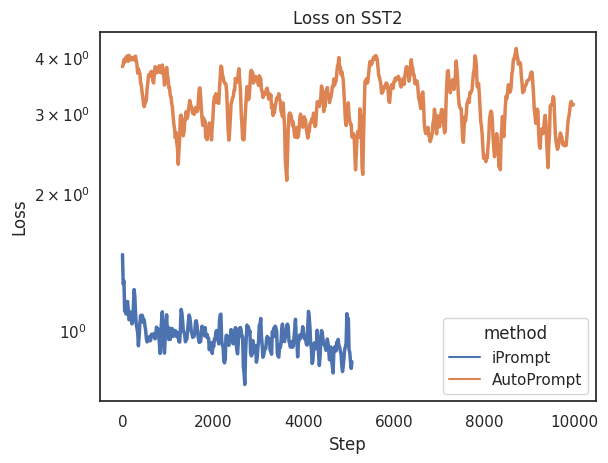

In [145]:
sns.lineplot(data=full_df, x='step', y='loss', hue='method', linewidth=2.5)

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss on SST2')
plt.yscale('log')
